In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

years_list = [2010, 2011, 2012, 2013, 2014]

from params import states_list

In [2]:
# Import uncleaned state pop data

unclean_state_pop = pd.read_excel('Resources/nst-est2019-01.xlsx')

# clean state population into clean dataframe

state_pop = unclean_state_pop.dropna()
state_pop = state_pop.rename(columns = {'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'State',
                                 'Unnamed: 3' : '2010',
                                 'Unnamed: 4' : '2011',
                                 'Unnamed: 5' :' 2012',
                                 'Unnamed: 6' : '2013',
                                 'Unnamed: 7' : '2014'})
state_pop = state_pop.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
               'Unnamed: 11', 'Unnamed: 12'], axis=1)

state_pop = state_pop.reset_index(drop = True)
state_pop = state_pop.set_index('State')
state_pop = state_pop.drop(['United States', 'Northeast', 'Midwest', 'South', 'West', 'Alabama', 'Alaska', 
                           'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Georgia',
                           'Hawaii', 'Idaho', 'Indiana', 'Kansas', 'Louisiana', 'Maine', 'Massachusetts', 'Michigan',
                           'Mississippi', 'Missouri', 'Montana', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
                           'New York', 'North Dakota', 'Oklahoma', 'Ohio', 'Oregon', 'Pennsylvania','Rhode Island',
                           'South Dakota','Texas','Utah','Virginia','Washington','West Virginia','Wisconsin', 
                           'Wyoming','Puerto Rico'])

state_pop

,2010,2011,2012,2013,2014
State,,,,,
Arizona,6407172,6472643.0,6554978.0,6632764.0,6730413.0
Florida,18845537,19053237.0,19297822.0,19545621.0,19845911.0
Illinois,12840503,12867454.0,12882510.0,12895129.0,12884493.0
Iowa,3050745,3066336.0,3076190.0,3092997.0,3109350.0
Kentucky,4348181,4369821.0,4386346.0,4404659.0,4414349.0
Maryland,5788645,5839419.0,5886992.0,5923188.0,5957283.0
Minnesota,5310828,5346143.0,5376643.0,5413479.0,5451079.0
Nebraska,1829542,1840672.0,1853303.0,1865279.0,1879321.0
North Carolina,9574323,9657592.0,9749476.0,9843336.0,9932887.0


In [3]:
state_pop.to_csv('Resources/state_pop.csv')

In [4]:
# import ER data from CSV file
ER_data = pd.read_excel('Resources/HCUP_clean.xlsx')
ER_data = ER_data.set_index('State')
ER_data

,2010,2011,2012,2013,2014
State,,,,,
Arizona,2305413,2416553,2476208,2432305,2569082
Florida,8173500,8507584,9041333,9194744,9764626
Illinois,4955198,5140486,5305026,5092925,5245177
Iowa,1140898,1171011,1188770,1159998,1194712
Kentucky,2404944,2433143,2430001,2321513,2436880
Maryland,2408759,2498178,2619227,2530131,2527936
Minnesota,1801852,1876179,1789410,1749949,1865994
Nebraska,536858,538245,546455,551549,563255
North Carolina,4125701,5633259,4499568,4585990,4672977


In [5]:
# create copy of dataframes for calculations
ER_data_copy = ER_data.copy()
state_pop_copy = state_pop.copy()

ER_visits_rate = pd.DataFrame(ER_data_copy.values / state_pop_copy.values * 100000, columns = years_list , index = states_list) 
ER_visits_rate.to_csv('Resources/ER_visits_rate_clean.csv')
ER_visits_rate

,2010,2011,2012,2013,2014
Arizona,35981.8,37334.9,37776,36671.1,38171.2
Florida,43371,44651.6,46851.6,47042.5,49202.2
Illinois,38590.4,39949.5,41180.1,39495,40709.2
Iowa,37397.4,38189.3,38644.2,37504,38423.2
Kentucky,55309.2,55680.6,55399.2,52705.9,55203.6
Maryland,41611.8,42781.3,44491.8,42715.7,42434.4
Minnesota,33927.9,35094.1,33281.2,32325.8,34231.6
Nebraska,29343.8,29241.8,29485.5,29569.2,29971.2
North Carolina,43091.3,58329.9,46151.9,46589.8,47045.5
South Carolina,46790.5,47763.5,48406.2,48759.4,49577.6


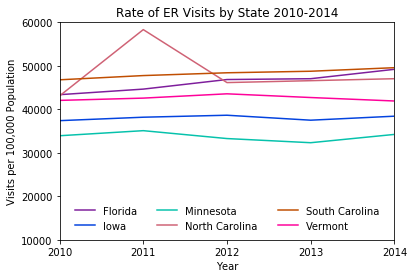

In [6]:
# Exploratory plots of top three and bottom three states by insurance coverage 

plt.plot(years_list, ER_visits_rate.loc['Florida',[2010,2011,2012,2013,2014]], color='xkcd:purple', label = 'Florida', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Iowa',[2010,2011,2012,2013,2014]], color='xkcd:blue', label = 'Iowa', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Minnesota',[2010,2011,2012,2013,2014]], color='xkcd:turquoise', label = 'Minnesota', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['North Carolina',[2010,2011,2012,2013,2014]], color='xkcd:rose', label = 'North Carolina', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['South Carolina',[2010,2011,2012,2013,2014]], color='xkcd:burnt orange', label = 'South Carolina', linestyle = '-')
plt.plot(years_list, ER_visits_rate.loc['Vermont',[2010,2011,2012,2013,2014]], color='xkcd:neon pink', label = 'Vermont', linestyle = '-')

plt.xlim(2010, 2014)
plt.xticks(np.arange(2010, 2015, 1.0))
plt.legend(frameon=False, loc='lower center', ncol=3)
plt.ylim(10000, 60000)
plt.ylabel("Visits per 100,000 Population")
plt.title("Rate of ER Visits by State 2010-2014")
plt.xlabel("Year")
plt.show()

In [7]:
ER_visits_rate.sort_values(by=[2010], axis=0, ascending=False)

,2010,2011,2012,2013,2014
Kentucky,55309.2,55680.6,55399.2,52705.9,55203.6
Tennessee,47983.7,48847.4,46189.3,44980.4,42125.5
South Carolina,46790.5,47763.5,48406.2,48759.4,49577.6
Florida,43371,44651.6,46851.6,47042.5,49202.2
North Carolina,43091.3,58329.9,46151.9,46589.8,47045.5
Vermont,42056.4,42579.8,43569,42715.7,41918.4
Maryland,41611.8,42781.3,44491.8,42715.7,42434.4
Illinois,38590.4,39949.5,41180.1,39495,40709.2
Iowa,37397.4,38189.3,38644.2,37504,38423.2
Arizona,35981.8,37334.9,37776,36671.1,38171.2


In [8]:
# pull uninsured/insured data and start comparisons to ER visits
uninsured_data = pd.read_csv('Resources/dataframe_uninsured.csv')
insured_data = pd.read_csv('Resources/dataframe_insured.csv')

In [9]:
uninsured_data_copy = uninsured_data.copy()
insured_data_copy = insured_data.copy()

uninsured_data_copy = uninsured_data_copy.set_index('State')
insured_data_copy = insured_data_copy.set_index('State')

del uninsured_data_copy.index.name
del insured_data_copy.index.name

insured_data_copy

,2010,2011,2012,2013,2014
ARIZONA,5245000,5283000,5313000,5403000,5720000
FLORIDA,14593000,14841000,15195000,15392000,16338000
ILLINOIS,10928000,11029000,11076000,11086000,11464000
IOWA,2725000,2748000,2775000,2798000,2874000
KENTUCKY,3596000,3666000,3697000,3696000,3962000
MARYLAND,5047000,5138000,5191000,5241000,5423000
MINNESOTA,4776000,4819000,4895000,4923000,5081000
NEBRASKA,1594000,1607000,1621000,1632000,1674000
NORTH CAROLINA,7791000,7916000,7970000,8136000,8476000
SOUTH CAROLINA,3742000,3813000,3845000,3939000,4092000


In [10]:
uninsured_data_copy.sort_values(by = '2010', ascending = False)

,2010,2011,2012,2013,2014
FLORIDA,3941000,3911000,3816000,3853000,3245000
ILLINOIS,1746000,1659000,1622000,1618000,1238000
NORTH CAROLINA,1570000,1545000,1582000,1509000,1276000
ARIZONA,1065000,1095000,1131000,1118000,903000
TENNESSEE,899000,923000,882000,887000,776000
SOUTH CAROLINA,795000,766000,778000,739000,642000
KENTUCKY,647000,618000,595000,616000,366000
MARYLAND,641000,598000,598000,593000,463000
MINNESOTA,476000,467000,425000,440000,317000
IOWA,280000,269000,254000,248000,189000


In [11]:
insured_rate = pd.DataFrame(insured_data_copy.values / state_pop_copy.values * 100, columns = years_list , index = states_list) 
insured_rate.sort_values(by = 2010, ascending = False)

,2010,2011,2012,2013,2014
Vermont,91.0719,92.3373,92.6384,91.9819,94.3677
Minnesota,89.9295,90.1398,91.0419,90.9397,93.2109
Iowa,89.3224,89.6184,90.209,90.4624,92.4309
Maryland,87.1879,87.9882,88.1775,88.4828,91.0314
Nebraska,87.1256,87.3051,87.4655,87.4936,89.0747
Illinois,85.1057,85.7124,85.977,85.9704,88.9752
Tennessee,84.3546,84.0718,84.8015,84.8123,86.7116
Kentucky,82.7012,83.8936,84.2843,83.9111,89.7528
Arizona,81.8614,81.6204,81.0529,81.4593,84.9874
North Carolina,81.3739,81.9666,81.748,82.6549,85.3327


In [12]:
uninsured_rate = pd.DataFrame(uninsured_data_copy.values / state_pop_copy.values * 100, columns = years_list , index = states_list) 

uninsured_rate.to_csv('Resources/uninsured_rate.csv')
uninsured_rate.sort_values(by = 2010, ascending = False)

,2010,2011,2012,2013,2014
Florida,20.9121,20.5267,19.7743,19.7129,16.351
South Carolina,17.1497,16.3956,16.4923,15.5119,13.3095
Arizona,16.622,16.9174,17.2541,16.8557,13.4167
North Carolina,16.398,15.9978,16.2265,15.3302,12.8462
Kentucky,14.8798,14.1425,13.5648,13.9852,8.29114
Tennessee,14.1456,14.4235,13.6662,13.658,11.8632
Illinois,13.5976,12.893,12.5907,12.5474,9.60845
Nebraska,11.369,11.2459,11.1153,11.2048,9.52472
Maryland,11.0734,10.2407,10.158,10.0115,7.772
Iowa,9.17809,8.77269,8.25697,8.01811,6.07844


## 2010-2014 ER/Uninsured Scatter and Regression

In [13]:
# pull unisured percentage data points to x_values for plotting and regression analysis

x_values = uninsured_rate[2010].tolist() + uninsured_rate[2011].tolist() + uninsured_rate[2012].tolist() + uninsured_rate[2013].tolist()+ uninsured_rate[2014].tolist()
x_marks = np.arange(min(x_values), max(x_values))

In [14]:
# pull ER visits rates as y_values for plotting

er_rates = ER_visits_rate[2010].tolist() + ER_visits_rate[2011].tolist() + ER_visits_rate[2012].tolist() + ER_visits_rate[2013].tolist()+ ER_visits_rate[2014].tolist()

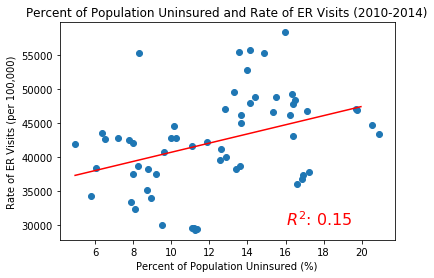

In [15]:
# plot rate of ER visits to percent of population uninsured and calculate regression 

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, er_rates)

plt.title('Percent of Population Uninsured and Rate of ER Visits (2010-2014)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values, er_rates)
plt.plot(x_marks, intercept + slope * x_marks, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (16, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_combined.png')

plt.show()

## 2010 ER/Uninsured Scatter and Regression

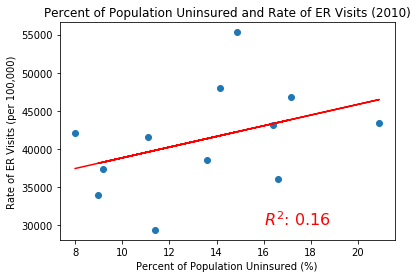

In [16]:
# plot rate of ER visits to percent of population uninsured and calculate regression  in 2010

column_years = [2010, 2011, 2012, 2013, 2014]
x_values_2010 = uninsured_rate[column_years[0]]
y_values_2010 = ER_visits_rate[column_years[0]]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2010.astype(float), y_values_2010.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits (2010)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2010, y_values_2010)
plt.plot(x_values_2010, intercept + slope * x_values_2010, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (16, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_2010.png')

plt.show()

## 2011 ER/Uninsured Scatter and Regression

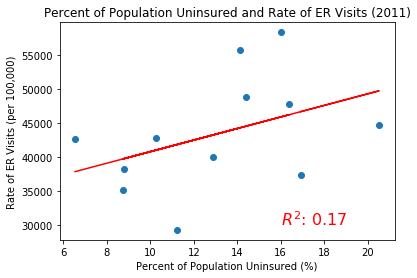

In [17]:
# plot rate of ER visits to percent of population uninsured and calculate regression in 2011

x_values_2011 = uninsured_rate[column_years[1]]
y_values_2011 = ER_visits_rate[column_years[1]]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2011.astype(float), y_values_2011.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits (2011)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2011, y_values_2011)
plt.plot(x_values_2011, intercept + slope * x_values_2011, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (16, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_2011.png')

plt.show()

## 2012 ER/Uninsured Scatter and Regression

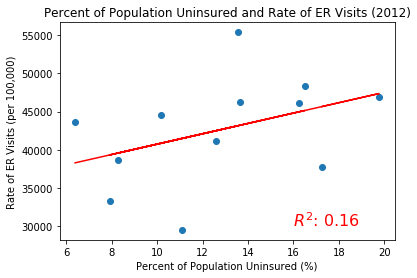

In [18]:
# plot rate of ER visits to percent of population uninsured and calculate regression in 2012

x_values_2012 = uninsured_rate[column_years[2]]
y_values_2012 = ER_visits_rate[column_years[2]]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2012.astype(float), y_values_2012.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits (2012)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2012, y_values_2012)
plt.plot(x_values_2012, intercept + slope * x_values_2012, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (16, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_2012.png')

plt.show()

## 2013 ER/Uninsured Scatter and Regression

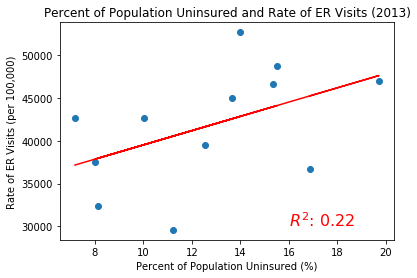

In [19]:
# plot rate of ER visits to percent of population uninsured and calculate regression in 2013

x_values_2013 = uninsured_rate[column_years[3]]
y_values_2013 = ER_visits_rate[column_years[3]]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2013.astype(float), y_values_2013.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits (2013)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2013, y_values_2013)
plt.plot(x_values_2013, intercept + slope * x_values_2013, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (16, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_2013.png')

plt.show()


## 2014 ER/Uninsured Scatter and Regression

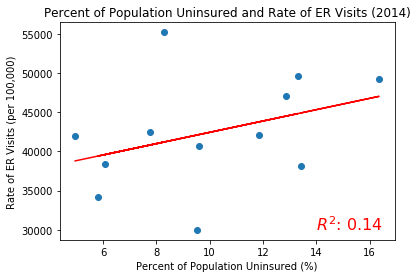

In [20]:
# plot rate of ER visits to percent of population uninsured and calculate regression in 2014

x_values_2014 = uninsured_rate[column_years[4]]
y_values_2014 = ER_visits_rate[column_years[4]]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2014.astype(float), y_values_2014.astype(float))

plt.title('Percent of Population Uninsured and Rate of ER Visits (2014)')
plt.ylabel('Rate of ER Visits (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2014, y_values_2014)
plt.plot(x_values_2014, intercept + slope * x_values_2014, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (14, 30000), c = 'r', fontsize = 16)
plt.savefig('Images/ER_visits_uninsured_regress_2014.png')

plt.show()

## Read in mortality rate csv

In [21]:
mortality_rate = pd.read_csv('Resources/crudemortality.csv')
mortality_rate = mortality_rate.set_index('STATE')
mortality_rate.columns= mortality_rate.columns.astype(int)
mortality_rate

,2010,2011,2012,2013,2014
STATE,,,,,
Arizona,731.6,747.4,755.8,761.6,765.6
Florida,924.4,910.5,916.0,924.0,934.8
Illinois,778.8,792.5,795.7,802.1,817.5
Iowa,910.8,919.6,922.9,936.1,939.5
Kentucky,967.5,975.4,996.1,994.6,1015.9
Maryland,750.4,748.6,754.9,769.3,767.5
Minnesota,734.8,744.6,743.7,755.9,759.5
Nebraska,830.7,840.1,843.9,842.9,849.2
North Carolina,826.1,827.7,840.4,846.1,858.5


## 2010-2014 Mortality/Uninsured Scatter and Regression

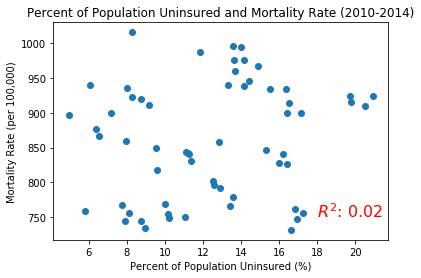

In [22]:
# Plot of mortality rate to percent of population uninsured and calculate regression grouped all years

mortality_rates = mortality_rate[2010].tolist() + mortality_rate[2011].tolist() + mortality_rate[2012].tolist() + mortality_rate[2013].tolist()+ mortality_rate[2014].tolist()

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, mortality_rates)

plt.title('Percent of Population Uninsured and Mortality Rate (2010-2014)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values, mortality_rates)
# plt.plot(x_values, intercept + slope * x_values, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (18, 750), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_combined.png')

plt.show()


## 2010 Mortality/Uninsured Scatter and Regression

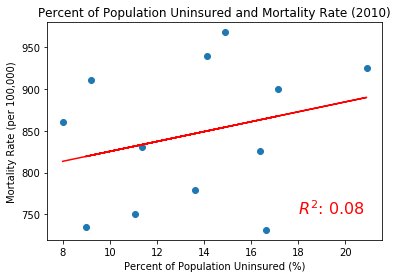

In [23]:
# Plot of mortality rate to percent of population uninsured and calculate regression in 2010

column_years = [2010, 2011, 2012, 2013, 2014]

x_values_2010 = uninsured_rate[column_years[0]]
y_values_2010 = mortality_rate[column_years[0]]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2010.astype(float), y_values_2010.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate (2010)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2010, y_values_2010)
plt.plot(x_values_2010, intercept + slope * x_values_2010, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (18, 750), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_2010.png')

plt.show()

## 2011 Mortality/Uninsured Scatter and Regression

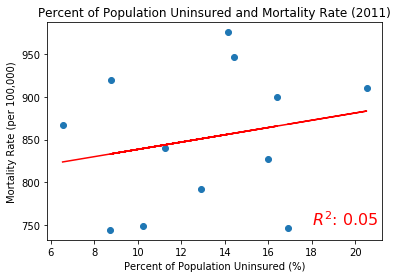

In [24]:
# Plot of mortality rate to percent of population uninsured and calculate regression in 2011

x_values_2011 = uninsured_rate[column_years[1]]
y_values_2011 = mortality_rate[column_years[1]]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2011.astype(float), y_values_2011.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate (2011)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2011, y_values_2011)
plt.plot(x_values_2011, intercept + slope * x_values_2011, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (18, 750), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_2011.png')

plt.show()

## 2012 Mortality/Uninsured Scatter and Regression

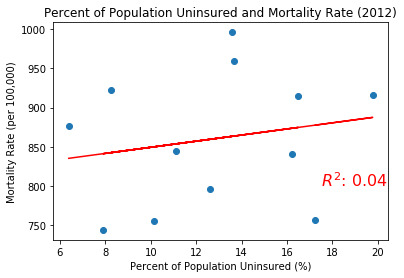

In [25]:
# Plot of mortality rate to percent of population uninsured and calculate regression

column_years = [2010, 2011, 2012, 2013, 2014]

x_values_2012 = uninsured_rate[column_years[2]]
y_values_2012 = mortality_rate[column_years[2]]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2012.astype(float), y_values_2012.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate (2012)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2012, y_values_2012)
plt.plot(x_values_2012, intercept + slope * x_values_2012, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (17.5, 800), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_2012.png')

plt.show()

## 2013 Mortality/Uninsured Scatter and Regression

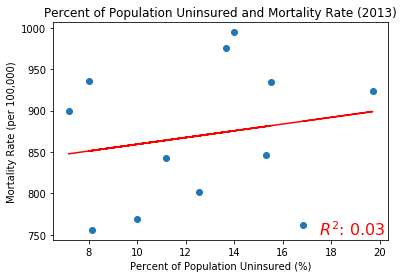

In [26]:
# Plot of mortality rate to percent of population uninsured and calculate regression

column_years = [2010, 2011, 2012, 2013, 2014]

x_values_2013 = uninsured_rate[column_years[3]]
y_values_2013 = mortality_rate[column_years[3]]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2013.astype(float), y_values_2013.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate (2013)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2013, y_values_2013)
plt.plot(x_values_2013, intercept + slope * x_values_2013, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (17.5, 750), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_2013.png')

plt.show()

## 2014 Mortality/Uninsured Scatter and Regression

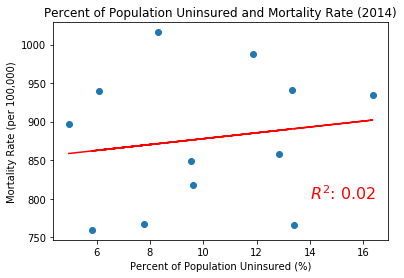

In [27]:
# Plot of mortality rate to percent of population uninsured and calculate regression

column_years = [2010, 2011, 2012, 2013, 2014]

x_values_2014 = uninsured_rate[column_years[4]]
y_values_2014 = mortality_rate[column_years[4]]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values_2014.astype(float), y_values_2014.astype(float))

plt.title('Percent of Population Uninsured and Mortality Rate (2014)')
plt.ylabel('Mortality Rate (per 100,000)')
plt.xlabel('Percent of Population Uninsured (%)')
plt.scatter(x_values_2014, y_values_2014)
plt.plot(x_values_2014, intercept + slope * x_values_2014, 'r')
plt.annotate(f'$R^2$: {round(rvalue*rvalue,2)}', (14, 800), c = 'r', fontsize = 16)
plt.savefig('Images/Mortality_rate_uninsured_regress_2014.png')

plt.show()

In [30]:
data_2010 = "Resources/raw_data_2010.csv"
health_care_data_2010 = pd.read_csv(data_2010)
data_2011 = "Resources/raw_data_2011.csv"
health_care_data_2011 = pd.read_csv(data_2011)
data_2012 = "Resources/raw_data_2012.csv"
health_care_data_2012 = pd.read_csv(data_2012)
data_2013 = "Resources/raw_data_2013.csv"
health_care_data_2013 = pd.read_csv(data_2013)
data_2014 = "Resources/raw_data_2014.csv"
health_care_data_2014 = pd.read_csv(data_2014)

In [31]:
health_care_2010 = health_care_data_2010.rename(columns={"Location": "State"})
health_care_2011 = health_care_data_2011.rename(columns={"Location": "State"})
health_care_2012 = health_care_data_2012.rename(columns={"Location": "State"})
health_care_2013 = health_care_data_2013.rename(columns={"Location": "State"})
health_care_2014 = health_care_data_2014.rename(columns={"Location": "State"})

In [ ]:
x = health_care_2010.merge(health_care_2011,)

In [ ]:
x = health_care_2010.merge(health_care_2011, on = "State", suffixes = ("_2010","_2011")).merge(health_care_2012, on = "State", suffixes = ("2012","2012")).merge(health_care_2013, on = "State", suffixes = ("_2012","_2013")).merge(health_care_2014, on = "State", suffixes = ("_2014","_2014"))
x.head(5)

In [ ]:
df=x

In [ ]:
df = df.dropna(how='any')

In [ ]:
df = df.set_index('State')

In [ ]:
for index, row in df.iterrows():
    
    if index not in states_list:
        
        df = df.drop(index)
df=df.rename(columns={"Health Spending per Capita": "2014",
                      "Health Spending per Capita_2010": "2010",
                      "Health Spending per Capita_2011": "2011",
                      "Health Spending per Capita_2012": "2012",
                      "Health Spending per Capita_2013": "2013"})
df

In [ ]:
y_axis = mortality_data
plt.title("Mortality rate vs Health Care Spending")
plt.xlabel("Health Care Spending Per Capita")
plt.ylabel("Mortality rate per 100,000")
scatter = plt.scatter(x_values, y_axis, marker="o", color="red")
plt.show()